# PCA : House prices 

## We load the libs

In [1]:
import pandas as pd
import sklearn 
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#vérification - librairie numpy
import numpy as np
#classe pour l'ACP
from sklearn.decomposition import PCA
from pprint import pprint
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## We load ours data

In [2]:
filename = 'data_quali_num.csv'
data = pd.read_csv(filename, index_col=0)

filename = 'data_quali_num.csv'
X = pd.read_csv('datasets/x_test_formatted.csv', index_col=0)
y = pd.read_csv('datasets/y_train.csv', index_col=0)

In [3]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,BsmtExposureNum,BsmtFinType1Num,BsmtFinType2Num,CentralAirNum,PavedDriveNum,ElectricalNum,FunctionalNum,GarageTypeNum,GarageFinishNum,FenceNum
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.25,1.00,0.17,1,0.5,1.00,1.00,0.83,0.67,0.00
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,1.00,0.83,0.17,1,0.5,1.00,1.00,0.83,0.67,0.00
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.50,1.00,0.17,1,0.5,1.00,1.00,0.83,0.67,0.00
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.25,0.83,0.17,1,0.5,1.00,1.00,0.17,0.33,0.00
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.75,1.00,0.17,1,0.5,1.00,1.00,0.83,0.67,0.00
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.25,1.00,0.17,1,0.5,1.00,1.00,0.83,0.33,0.75
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.75,1.00,0.17,1,0.5,1.00,1.00,0.83,0.67,0.00
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.50,0.83,0.66,1,0.5,1.00,1.00,0.83,0.67,0.00
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.25,0.17,0.17,1,0.5,0.50,0.84,0.17,0.33,0.00


## We select numeric columns

In [4]:
data_num = data.select_dtypes(exclude=['object'])
print(data_num)

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                            
1             60         65.0     8450            7            5       2003   
2             20         80.0     9600            6            8       1976   
3             60         68.0    11250            7            5       2001   
4             70         60.0     9550            7            5       1915   
5             60         84.0    14260            8            5       2000   
6             50         85.0    14115            5            5       1993   
7             20         75.0    10084            8            5       2004   
8             60          NaN    10382            7            6       1973   
9             50         51.0     6120            7            5       1931   
10           190         50.0     7420            5            6       1939   
11            20         70.0    11200            5 

## We convert all columns in float64

In [5]:
data_float = data_num.astype('float64')
data_ok = data_float.dropna()

## We get the shape of ours data
* we keep the number of observations in the variable n
* we keep the number of features in the variable p

In [6]:
data_ok.shape

(1121, 61)

In [7]:
n = data_ok.shape[0]

p = data_ok.shape[1]

## We standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

* instanciation
* transformation - centering-reduction

In [8]:
sc = StandardScaler()

data_cr = sc.fit_transform(data_ok)

## We calculate the mean

In [9]:
np.mean(data_cr,axis=0)


array([-3.84269878e-17, -2.34523472e-16,  3.16923611e-18,  2.66215833e-16,
       -1.42615625e-16, -1.81597229e-15, -1.78744917e-15, -6.33847222e-18,
        1.26769444e-17, -1.58461805e-18,  1.04980946e-16,  1.29938680e-16,
       -1.30730990e-16,  2.69385069e-17,  3.80308333e-17,  1.93323403e-16,
        3.01077430e-17, -2.21846528e-17, -2.18677292e-16, -6.02154861e-17,
        9.82463194e-17, -3.58123680e-16, -1.44200243e-16, -2.85231250e-17,
        1.48161788e-16, -1.45784861e-16, -2.06000347e-17, -6.33847222e-18,
       -5.66500955e-17,  1.70346441e-17, -6.33847222e-18, -2.06000347e-17,
       -1.26769444e-17, -1.90154167e-17, -1.36277153e-16,  3.64937538e-14,
        8.87386111e-17,  7.66955139e-16, -2.69385069e-17,  1.99661875e-16,
        0.00000000e+00,  3.35939028e-16, -8.39847569e-17, -1.91738785e-16,
        3.32769792e-17,  2.85231250e-16,  6.46524166e-16,  3.97739132e-16,
        5.07077778e-17,  9.38886197e-16,  1.02683250e-15, -8.31924479e-17,
       -1.26769444e-16,  

## We compute the standard deviation

In [10]:
np.std(data_cr,axis=0,ddof=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## We initialyse the model

In [11]:
acp = PCA(svd_solver='full')

## We print the settings

In [12]:
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)


## We calculate the coordinates
* number of computed components : 6

In [13]:
coord = acp.fit_transform(data_cr)

print(acp.n_components_) # 6

61


In [14]:
pprint(coord[1])

array([ 4.57797823e-01, -1.88091993e+00,  1.14550156e+00, -3.25322485e-01,
       -7.44716322e-01, -2.98325072e-01, -1.37567497e+00, -8.21328260e-01,
       -4.88515876e-03,  1.52027023e+00, -5.84523143e-01, -2.71637801e+00,
       -7.46020623e-01, -1.31885135e-01,  9.64020564e-01,  2.35960073e+00,
       -3.42415069e-01,  3.18516676e-01,  1.41123624e+00, -2.99266041e-01,
       -9.14971160e-01, -5.68546000e-01,  2.76055672e-01,  1.17202838e+00,
       -3.86040135e-01, -1.50272085e+00,  8.75784851e-01,  1.16268108e+00,
       -2.55186655e-02, -4.32449952e-01, -1.01681897e+00, -5.14226190e-01,
       -2.86887264e-01, -2.76739874e-02,  1.43979115e+00,  3.95995660e-01,
       -1.51610657e-01, -3.84223711e-01,  2.05674671e-01,  9.91739868e-02,
        9.54993138e-01,  9.07667309e-02,  4.17783442e-01, -3.47085923e-01,
       -2.61526813e-01,  5.51495018e-02, -6.20859010e-01, -1.13334254e+00,
       -3.78843849e-02, -2.90978575e-01, -4.25085752e-01, -6.32880972e-01,
       -1.28495131e-01, -

## Explained variance

In [15]:
print(acp.explained_variance_)

[1.18319444e+01 3.95943928e+00 3.34124965e+00 2.48968656e+00
 2.15528029e+00 1.87203450e+00 1.75816006e+00 1.59994508e+00
 1.42917254e+00 1.40958393e+00 1.30749995e+00 1.26851055e+00
 1.21980091e+00 1.16185444e+00 1.12145996e+00 1.07522743e+00
 1.04489174e+00 9.92467159e-01 9.57944120e-01 9.43120040e-01
 9.03341361e-01 8.97932980e-01 8.77772217e-01 8.58320744e-01
 7.87775680e-01 7.68163981e-01 7.52914030e-01 7.32776066e-01
 6.98920431e-01 6.79348954e-01 6.38243103e-01 6.29839294e-01
 6.09942190e-01 5.72331399e-01 5.58224735e-01 5.16347277e-01
 5.02182478e-01 4.73062905e-01 4.32489862e-01 3.78190936e-01
 3.68176039e-01 3.48599047e-01 3.36710186e-01 3.19641744e-01
 2.90215734e-01 2.64192045e-01 2.53837066e-01 2.19593992e-01
 2.06400542e-01 1.95263207e-01 1.71753664e-01 1.65226105e-01
 1.52459774e-01 1.41769137e-01 1.19781619e-01 1.03610274e-01
 9.97718524e-02 8.91761738e-02 2.33343959e-30 6.72329016e-32
 5.33109604e-32]


## Corrected value

In [16]:
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[1.18213896e+01 3.95590722e+00 3.33826905e+00 2.48746561e+00
 2.15335765e+00 1.87036453e+00 1.75659168e+00 1.59851783e+00
 1.42789763e+00 1.40832650e+00 1.30633358e+00 1.26737896e+00
 1.21871277e+00 1.16081799e+00 1.12045955e+00 1.07426826e+00
 1.04395964e+00 9.91581818e-01 9.57089576e-01 9.42278720e-01
 9.02535525e-01 8.97131969e-01 8.76989191e-01 8.57555070e-01
 7.87072936e-01 7.67478733e-01 7.52242385e-01 7.32122385e-01
 6.98296952e-01 6.78742934e-01 6.37673751e-01 6.29277439e-01
 6.09398084e-01 5.71820845e-01 5.57726765e-01 5.15886664e-01
 5.01734501e-01 4.72640904e-01 4.32104054e-01 3.77853567e-01
 3.67847603e-01 3.48288075e-01 3.36409820e-01 3.19356604e-01
 2.89956844e-01 2.63956370e-01 2.53610628e-01 2.19398101e-01
 2.06216420e-01 1.95089021e-01 1.71600449e-01 1.65078713e-01
 1.52323770e-01 1.41642670e-01 1.19674766e-01 1.03517847e-01
 9.96828499e-02 8.90966233e-02 2.33135803e-30 6.71729258e-32
 5.32634038e-32]


## proportion of variance explained

In [17]:
print(acp.explained_variance_ratio_)

[1.97023160e-01 6.59317869e-02 5.56378176e-02 4.14577602e-02
 3.58892941e-02 3.11727422e-02 2.92765280e-02 2.66419639e-02
 2.37982938e-02 2.34721083e-02 2.17722264e-02 2.11229826e-02
 2.03118796e-02 1.93469666e-02 1.86743259e-02 1.79044711e-02
 1.73993273e-02 1.65263636e-02 1.59514929e-02 1.57046453e-02
 1.50422588e-02 1.49521995e-02 1.46164865e-02 1.42925845e-02
 1.31178823e-02 1.27913122e-02 1.25373731e-02 1.22020398e-02
 1.16382825e-02 1.13123822e-02 1.06278959e-02 1.04879573e-02
 1.01566347e-02 9.53034741e-03 9.29544608e-03 8.59811106e-03
 8.36224169e-03 7.87734840e-03 7.20173424e-03 6.29755944e-03
 6.13079339e-03 5.80480126e-03 5.60683033e-03 5.32261006e-03
 4.83261406e-03 4.39927283e-03 4.22684380e-03 3.65663501e-03
 3.43694034e-03 3.25148368e-03 2.86000749e-03 2.75131188e-03
 2.53872950e-03 2.36071117e-03 1.99457944e-03 1.72529746e-03
 1.66138083e-03 1.48494372e-03 3.88559671e-32 1.11954876e-33
 8.87723397e-34]


## we showing scree plot

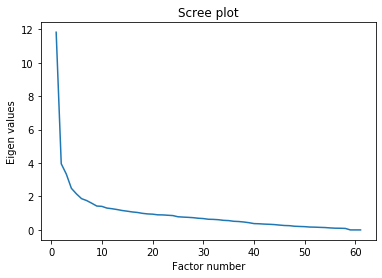

In [18]:
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()


## We showing cumulative variance explained plot

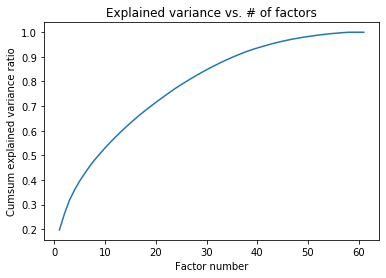

In [19]:
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


## Thresholds for testing broken sticks

In [20]:
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]


## broken sticks test

In [21]:
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))


      Val.Propre    Seuils
0   1.182139e+01  4.696264
1   3.955907e+00  3.696264
2   3.338269e+00  3.196264
3   2.487466e+00  2.862931
4   2.153358e+00  2.612931
5   1.870365e+00  2.412931
6   1.756592e+00  2.246264
7   1.598518e+00  2.103407
8   1.427898e+00  1.978407
9   1.408326e+00  1.867296
10  1.306334e+00  1.767296
11  1.267379e+00  1.676387
12  1.218713e+00  1.593053
13  1.160818e+00  1.516130
14  1.120460e+00  1.444702
15  1.074268e+00  1.378035
16  1.043960e+00  1.315535
17  9.915818e-01  1.256711
18  9.570896e-01  1.201156
19  9.422787e-01  1.148524
20  9.025355e-01  1.098524
21  8.971320e-01  1.050905
22  8.769892e-01  1.005451
23  8.575551e-01  0.961972
24  7.870729e-01  0.920306
25  7.674787e-01  0.880306
26  7.522424e-01  0.841844
27  7.321224e-01  0.804807
28  6.982970e-01  0.769093
29  6.787429e-01  0.734610
..           ...       ...
31  6.292774e-01  0.669019
32  6.093981e-01  0.637769
33  5.718208e-01  0.607466
34  5.577268e-01  0.578054
35  5.158867e-01  0.549482
3

## We display the dimensions two by two

In [22]:
coord_df = pd.DataFrame(coord)
coord_ok = coord_df.T
coord_ok

,0,1,2,3,4,5,6,7,8,9,...,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120
0,1.834402e+00,4.577978e-01,2.628024e+00,-6.185927e-01,4.871767e+00,-8.701777e-01,4.439483e+00,-3.086243e+00,-2.643595e+00,-3.032515e+00,...,3.352464e+00,-4.992005e+00,4.117786e+00,-7.532668e-01,1.077135e+00,4.757470e-01,1.195272e+00,1.121837e+00,-2.806444e+00,-7.361290e-01
1,-2.390715e-01,-1.880920e+00,-1.661997e-01,8.328559e-01,1.290346e+00,-2.574366e+00,-1.954493e+00,4.287609e+00,-1.668114e+00,-1.907725e+00,...,3.732311e-01,1.825608e+00,6.765643e-01,-3.198525e+00,-1.635740e+00,1.383118e+00,-1.161644e+00,1.954215e+00,-3.470194e+00,-2.217127e+00
2,-1.493513e+00,1.145502e+00,-8.862037e-01,8.347770e-01,3.710901e-01,-1.756941e-01,5.844420e-01,1.179901e+00,8.846762e-01,2.381916e-01,...,1.266121e-01,2.306171e-01,-2.101940e+00,-2.141177e+00,-2.654451e+00,-1.956192e+00,3.465806e+00,2.746723e+00,2.127514e+00,1.304894e+00
3,-1.434683e+00,-3.253225e-01,-1.183319e+00,-7.391611e-01,-8.976214e-01,-9.188169e-01,1.016253e+00,2.741006e+00,-1.003411e+00,5.305503e-01,...,-1.054622e+00,2.299647e-01,2.224716e+00,-5.714268e-01,7.214383e-01,-7.103535e-01,5.229112e-01,-4.747251e+00,-3.729880e-01,-8.284968e-01
4,2.124207e+00,-7.447163e-01,1.262437e+00,1.941661e-01,1.612175e+00,6.814851e-01,9.065658e-01,8.894894e-01,2.701094e+00,5.676299e-01,...,1.935732e+00,7.446265e-03,-2.321284e+00,3.048077e+00,2.950437e-01,-7.525262e-01,-7.327850e-01,-3.802197e+00,-6.682830e-01,4.306000e-01
5,-1.626183e-01,-2.983251e-01,-8.478760e-03,1.331051e+00,-2.820907e-01,-7.660575e-01,3.287791e-01,1.727655e+00,-2.064901e+00,-5.252316e-01,...,-2.161041e-01,2.072915e+00,-4.649366e-01,2.003118e-01,1.560353e+00,-8.906726e-01,-5.048967e-01,1.192451e+00,1.848183e+00,-1.183269e-01
6,4.405246e-01,-1.375675e+00,1.087833e-02,-2.571937e-01,2.500190e-01,-1.051301e+00,-1.114389e+00,-3.815956e-01,-9.025876e-01,-3.990165e-01,...,-8.906060e-01,4.492005e-03,-7.461269e-02,5.024891e-01,-2.977008e-01,4.264683e-01,7.671905e-01,-4.257118e+00,3.902914e+00,1.124001e+00
7,7.233505e-01,-8.213283e-01,-9.453025e-01,9.523309e-02,-3.619171e-01,4.387557e-01,7.838812e-02,-5.274974e-01,1.877828e-01,5.184265e-01,...,-4.612013e-01,-5.081623e-02,5.531358e-01,-1.999993e-01,1.693985e+00,-1.446879e+00,8.813594e-01,3.965468e+00,9.335784e-01,-3.036166e-01
8,-5.953193e-01,-4.885159e-03,1.110907e-01,8.890561e-01,4.601242e-01,-3.691671e-01,-3.958525e-01,-1.297741e+00,-1.839406e-01,1.071111e-01,...,-5.527174e-01,-1.629984e-02,-5.513033e-01,4.238395e-01,7.478693e-01,-4.466125e-01,-2.417854e+00,-1.522313e+00,-2.287701e+00,-1.690700e+00
9,9.477236e-01,1.520270e+00,4.136706e-01,-1.106456e+00,1.177183e+00,2.033527e+00,-2.729083e-02,-1.411571e+00,-2.954658e+00,4.836790e-01,...,-9.855649e-02,1.048852e+00,-8.560368e-01,-4.897276e-01,-8.750636e-01,-1.355220e-01,-6.044374e-01,-8.469565e-01,3.588425e-01,1.681861e+00


In [23]:
marker =  [".",",","o","v","^","<",">",".",",","o","v","^","<",">",".",",","o","v","^","<",">",".",",","o","v","^"]
neighborhood = pd.unique(data["Neighborhood"]).tolist()
neighborhood_all = [data.loc[Neighborhood_id, "Neighborhood"] for Neighborhood_id in data_ok.index]
 
markers = {}
for i in range(25):
    markers[neighborhood[i]] = marker[i]
    
len(neighborhood_all) 

1121

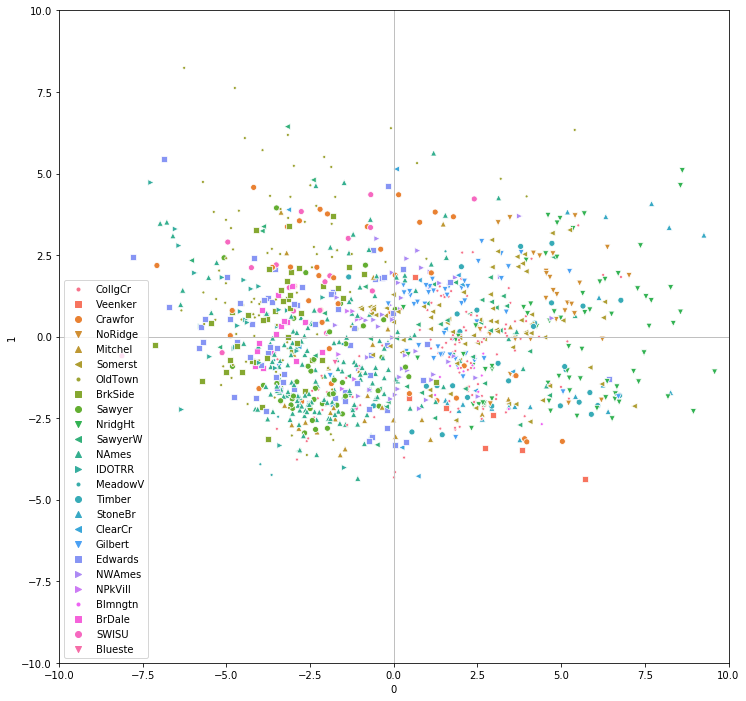

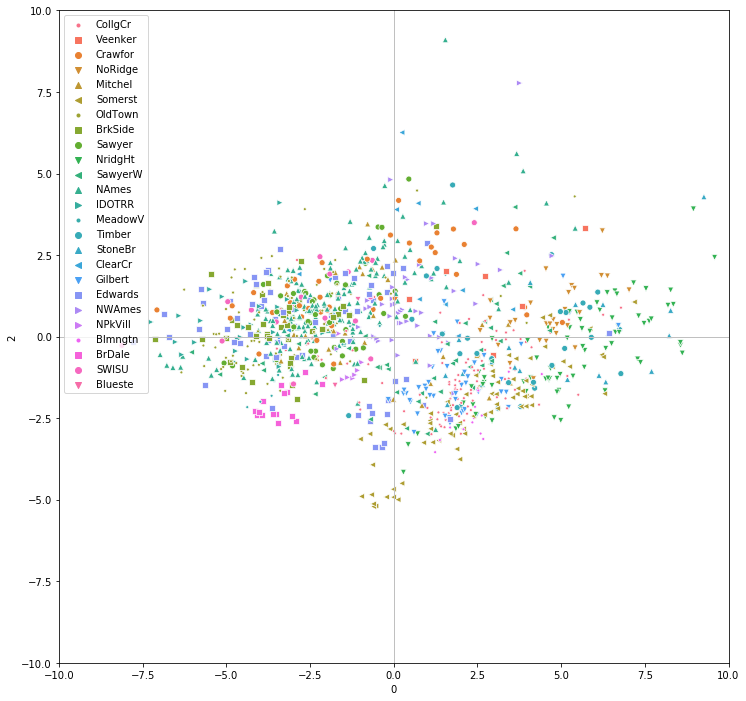

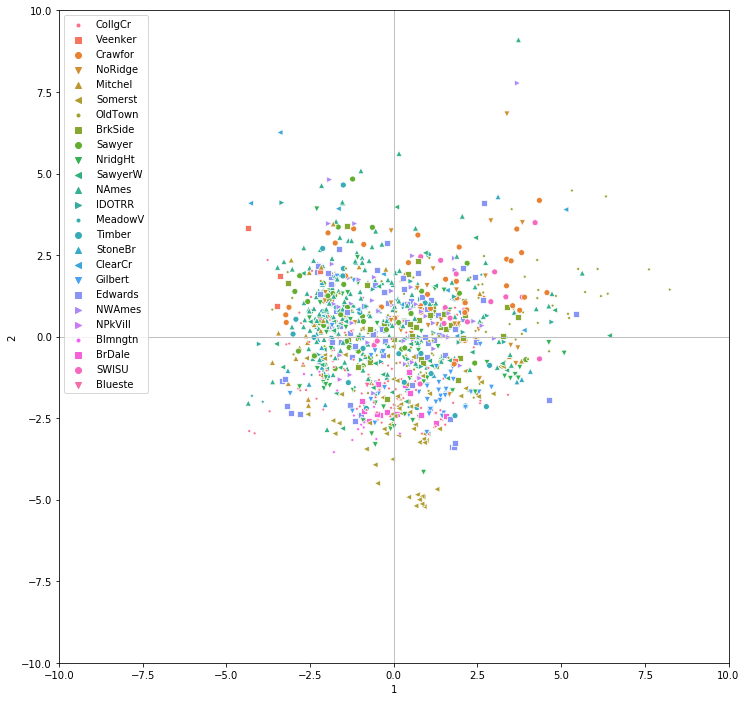

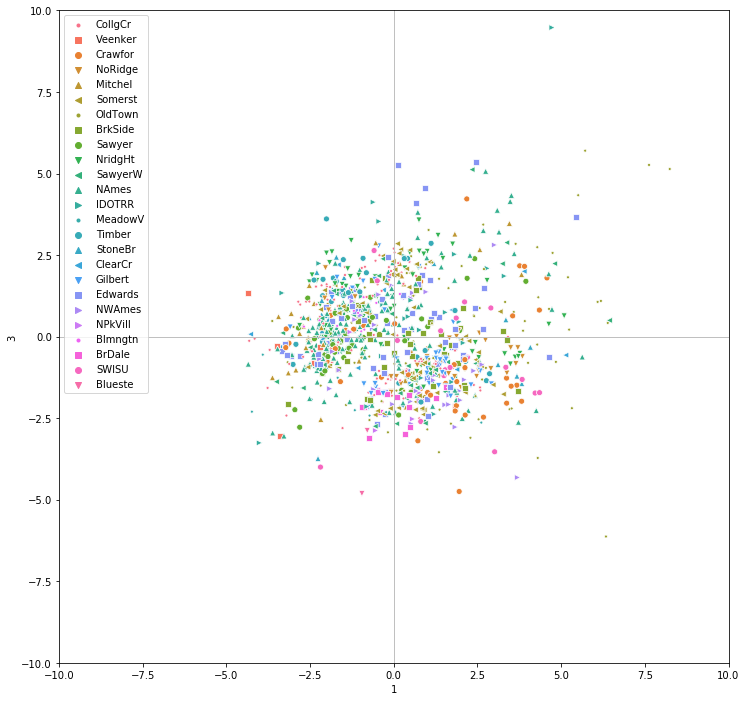

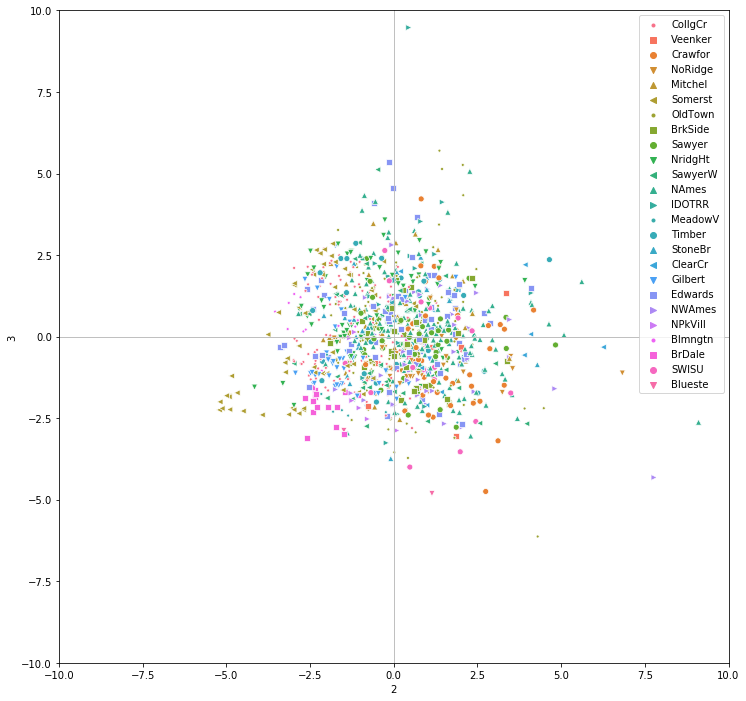

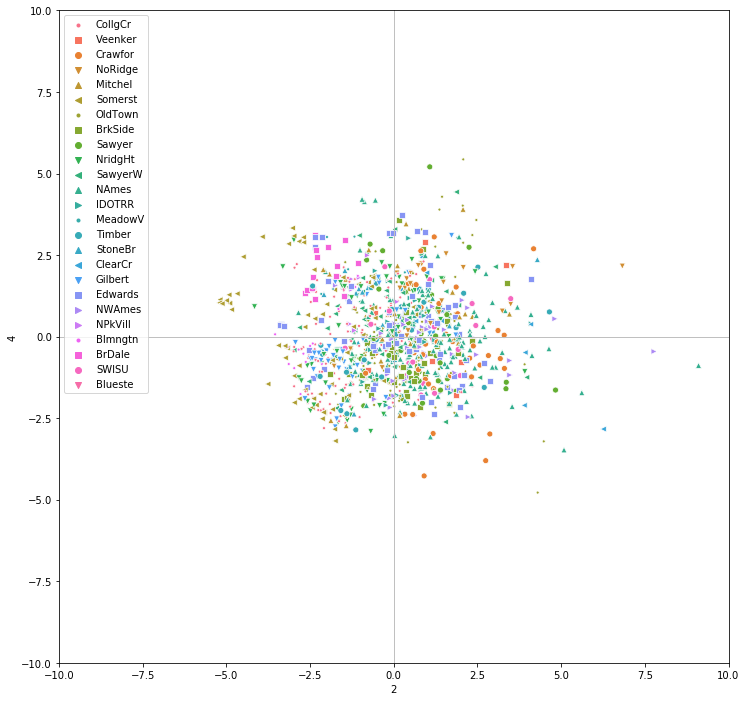

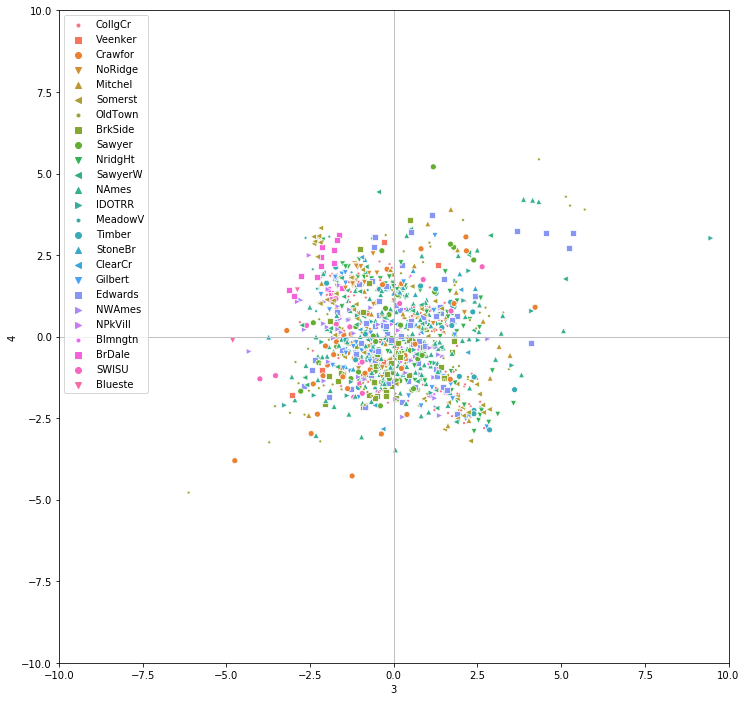

In [24]:
a1=[0,0,1,1,2,2,3]
a2=[1,2,2,3,3,4,4]

# markers = pd.unique(data_quali["Neighborhood"]).tolist()
for a in range(7): 
    #positionnement des individus dans le premier plan
    fig, axes = plt.subplots(figsize=(12,12))
    axes.set_xlim(-10,10) #même limites en abscisse
    axes.set_ylim(-10,10) #et en ordonnée
    #placement des étiquettes des observations
    
    sns.scatterplot(coord_ok.iloc[a1[a]],coord_ok.iloc[a2[a]],  data=coord_ok, style=neighborhood_all,  hue=neighborhood_all,  markers=markers)
    
    #ajouter les axes
    plt.plot([-10,10],[0,0],color='silver',linestyle='-',linewidth=1)
    plt.plot([0,0],[-10,10],color='silver',linestyle='-',linewidth=1)
    #affichage
    plt.show()

## contribution of individuals in total inertia

In [25]:
di = np.sum(data_cr**2,axis=1)
print(pd.DataFrame({'ID':data_ok.index,'d_i':di}))


        ID         d_i
0        1   23.047205
1        2   42.852981
2        3   18.859570
3        4   49.985517
4        5   40.014423
5        6  164.173731
6        7   34.258842
7        9   98.384376
8       10   84.897593
9       11   26.773764
10      12   73.725962
11      14   34.399577
12      16   43.987537
13      18  116.745369
14      19   22.844605
15      20   27.855621
16      21   62.067640
17      22   88.297784
18      23   34.499207
19      24   24.143866
20      26   44.834354
21      27   55.608330
22      28   39.144381
23      29   56.063261
24      30   93.130912
25      31  132.856566
26      33   29.653163
27      34   42.451768
28      35   45.857755
29      36   53.547286
...    ...         ...
1091  1421   27.444288
1092  1422   28.651429
1093  1423   40.640204
1094  1426   25.113948
1095  1427   30.894914
1096  1428   33.000682
1097  1429   58.499850
1098  1431   58.687725
1099  1433   72.793122
1100  1434   23.442467
1101  1435   59.267987
1102  1436 

## Quality of representation of individuals - COS2

In [26]:
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data_ok.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1], 'COS2_3':cos2[:,2],'COS2_4':cos2[:,3],'COS2_5':cos2[:,4]}))

        id    COS2_1    COS2_2    COS2_3    COS2_4        COS2_5
0        1  0.146006  0.002480  0.096783  0.089309  1.957832e-01
1        2  0.004891  0.082558  0.030620  0.002470  1.294198e-02
2        3  0.366207  0.001465  0.041642  0.074246  8.450601e-02
3        4  0.007655  0.013877  0.013941  0.010930  7.542279e-04
4        5  0.593139  0.041610  0.003441  0.020136  6.495425e-02
5        6  0.004612  0.040368  0.000188  0.005142  2.828844e-03
6        7  0.575297  0.111505  0.009970  0.030146  2.398976e-02
7        9  0.096813  0.186855  0.014150  0.076365  8.041840e-03
8       10  0.082318  0.032776  0.009219  0.011859  8.593774e-02
9       11  0.343476  0.135932  0.002119  0.010513  1.203431e-02
10      12  0.609757  0.050605  0.001315  0.012809  3.434741e-02
11      14  0.454808  0.006545  0.048093  0.153236  1.319211e-01
12      16  0.210913  0.004374  0.050629  0.000107  8.210977e-02
13      18  0.220040  0.050112  0.005627  0.048895  4.731780e-02
14      19  0.008283  0.1

## Online sum of cos2 = 1

In [27]:
print(np.sum(cos2,axis=1))


[1. 1. 1. ... 1. 1. 1.]


## Contributions to the axes

In [28]:
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':data_ok.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1],'CTR_3':ctr[:,2],'CTR_4':ctr[:,3],'CTR_5':ctr[:,4],'CTR_6':ctr[:,5]}))

        id         CTR_1     CTR_2     CTR_3     CTR_4         CTR_5  \
0        1  2.539305e-04  0.000013  0.000596  0.000738  1.869270e-03   
1        2  1.581515e-05  0.000798  0.000351  0.000038  2.297524e-04   
2        3  5.211762e-04  0.000006  0.000210  0.000502  6.602336e-04   
3        4  2.887589e-05  0.000156  0.000186  0.000196  1.561798e-05   
4        5  1.791013e-03  0.000375  0.000037  0.000289  1.076719e-03   
5        6  5.714020e-05  0.001494  0.000008  0.000303  1.923937e-04   
6        7  1.487273e-03  0.000861  0.000091  0.000370  3.404684e-04   
7        9  7.187635e-04  0.004146  0.000372  0.002694  3.277629e-04   
8       10  5.273703e-04  0.000627  0.000209  0.000361  3.022439e-03   
9       11  6.939557e-04  0.000821  0.000015  0.000101  1.334777e-04   
10      12  3.392369e-03  0.000841  0.000026  0.000339  1.049041e-03   
11      14  1.180612e-03  0.000051  0.000442  0.001890  1.879947e-03   
12      16  7.000969e-04  0.000043  0.000595  0.000002  1.496245

In [29]:
np.sum(ctr,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## The components_ field of the PCA object

In [30]:
print(acp.components_)

[[-1.63199421e-02  1.13311296e-01  8.18150525e-02 ...  1.54377725e-01
   1.99211507e-01 -6.46836957e-02]
 [ 9.91358775e-02  5.03406210e-02  2.53529781e-02 ... -1.32859050e-01
  -5.40117644e-02 -2.59563990e-02]
 [-1.38757995e-01  2.51884570e-01  2.71890703e-01 ...  5.75560015e-04
  -7.44494598e-02  1.55878370e-01]
 ...
 [-3.88969882e-16  2.69970514e-16  1.95634768e-16 ... -8.32667268e-17
  -1.66533454e-16  1.38777878e-16]
 [-0.00000000e+00  1.81278603e-16 -6.62823406e-17 ... -9.71445147e-17
  -5.63785130e-17 -1.21864324e-16]
 [-0.00000000e+00  2.08166817e-16  2.58837340e-16 ... -1.38777878e-16
   1.24900090e-16  2.42861287e-16]]


## square root of eigenvalues

In [31]:
sqrt_eigval = np.sqrt(eigval)

## correlation of variables with axes
* We print the matrix of variable correlations x factors

In [32]:
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

print(corvar)

[[-5.61116293e-02  1.97175933e-01 -2.53523770e-01 ... -5.93909759e-31
  -0.00000000e+00 -0.00000000e+00]
 [ 3.89589703e-01  1.00124790e-01  4.60216550e-01 ...  4.12212179e-31
   4.69833175e-32  4.80425400e-32]
 [ 2.81298540e-01  5.04257109e-02  4.96769617e-01 ...  2.98710526e-31
  -1.71788848e-32  5.97367219e-32]
 ...
 [ 5.30785319e-01 -2.64249511e-01  1.05160171e-03 ... -1.27138177e-31
  -2.51776629e-32 -3.20283600e-32]
 [ 6.84933940e-01 -1.07426497e-01 -1.36026091e-01 ... -2.54276354e-31
  -1.46120365e-32  2.88255240e-32]
 [-2.22397085e-01 -5.16258827e-02  2.84804289e-01 ...  2.11896962e-31
  -3.15844790e-32  5.60496300e-32]]


## We displays for the first six axes

In [33]:
ax = pd.DataFrame({'id':data_ok.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2],'COR_4':corvar[:,3],'COR_5':corvar[:,4], 'COR_6':corvar[:,5]})
ax

,id,COR_1,COR_2,COR_3,COR_4,COR_5,COR_6
0,MSSubClass,-0.056112,0.197176,-0.253524,-3.361335e-01,5.139613e-01,1.315301e-01
1,LotFrontage,0.389590,0.100125,0.460217,2.307796e-01,-1.974705e-01,-1.954680e-01
2,LotArea,0.281299,0.050426,0.496770,1.487900e-01,-8.252499e-02,-5.508251e-02
3,OverallQual,0.851692,0.099062,-0.095917,-3.870181e-02,-5.105154e-02,1.337885e-01
4,OverallCond,-0.246273,-0.060991,0.198335,-4.071867e-01,-3.578931e-01,1.649120e-01
5,YearBuilt,0.730827,-0.266412,-0.409447,2.855830e-02,1.159457e-01,-1.571288e-01
6,YearRemodAdd,0.652433,-0.118167,-0.355942,-1.254438e-01,-9.756544e-02,1.501053e-01
7,MasVnrArea,0.503266,0.097462,0.060509,4.395264e-02,1.796098e-01,-3.268511e-02
8,BsmtFinSF1,0.417840,-0.443007,0.461086,1.019978e-02,4.605229e-01,1.611261e-03
9,BsmtFinSF2,-0.041362,-0.223179,0.365446,-1.396133e-01,-1.928713e-01,1.459177e-01


## We only keeps the features that contributes to more than 0.5 on the axes
* we get the labels
* we get the nuber of values

In [35]:
ax_a = 1
ax_b = 2 
ax_c = 3
my_axes = []
labels = []
nbr_values = []
new_features = []

for a in range(4):
    ax1 = ax[(ax.iloc[:,ax_a] > 0.5) | (ax.iloc[:,ax_a] < -0.5) | (ax.iloc[:,ax_b] > 0.7) | (ax.iloc[:,ax_b] < -0.5)]
    ax2 = ax[(ax.iloc[:,ax_a] > 0.5) | (ax.iloc[:,ax_a] < -0.5) | (ax.iloc[:,ax_c] > 0.7) | (ax.iloc[:,ax_c] < -0.5)]
    ax_np1 = ax1.iloc[:,[ax_a,ax_b]]
    ax_np2 = ax2.iloc[:,[ax_a,ax_c]]
    my_axes.append(np.asarray(ax_np1))
    my_axes.append(np.asarray(ax_np2))
    label1 = ax1['id'].values
    label2 = ax2['id'].values
    labels.append(label1)
    labels.append(label2)
    new_features.append(label1)
    new_features.append(label2)
    ax1_s = ax1.shape
    ax2_s = ax2.shape
    nbr_values.append(ax1_s[0])
    nbr_values.append(ax2_s[0])
    ax_a += 1
    ax_b += 1 
    ax_c += 1
    
print(my_axes)
print(labels)
print(nbr_values)


[array([[ 8.51691696e-01,  9.90621973e-02],
       [ 7.30826556e-01, -2.66411987e-01],
       [ 6.52432679e-01, -1.18167414e-01],
       [ 5.03266159e-01,  9.74623910e-02],
       [ 7.12093166e-01, -1.82723706e-01],
       [ 6.59351411e-01, -4.04032599e-02],
       [ 6.85386303e-01,  5.66724439e-01],
       [ 6.56103928e-01,  3.57561395e-01],
       [ 5.21898722e-01,  6.52233336e-01],
       [ 7.05920747e-01, -1.85726152e-01],
       [ 7.29559123e-01,  1.36249593e-01],
       [ 7.08501998e-01,  6.11479566e-02],
       [ 8.80234114e-01,  1.04802399e-01],
       [ 7.80573182e-01,  3.58220449e-02],
       [ 5.49841468e-01, -5.74193934e-02],
       [ 7.35637373e-01, -6.80097916e-04],
       [ 7.39363349e-01, -1.82621999e-01],
       [ 5.43342622e-01,  1.70939674e-01],
       [ 3.71321693e-01, -5.50325932e-01],
       [ 5.30785319e-01, -2.64249511e-01],
       [ 6.84933940e-01, -1.07426497e-01]]), array([[ 0.8516917 , -0.09591742],
       [ 0.73082656, -0.40944695],
       [ 0.65243268, -0.

## We display the correlation circles for the first six dimentions

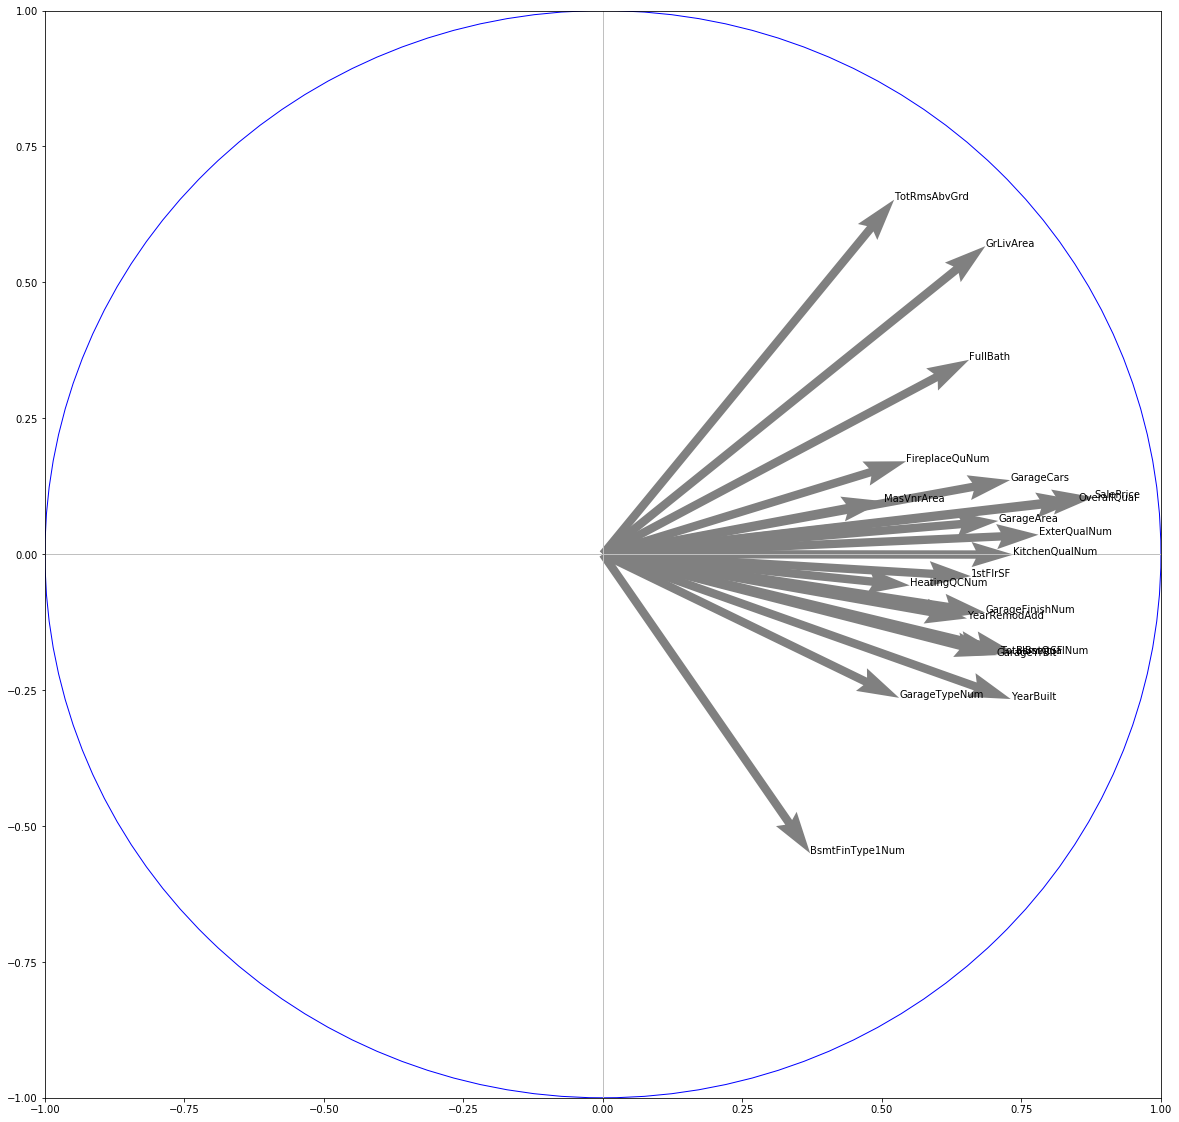

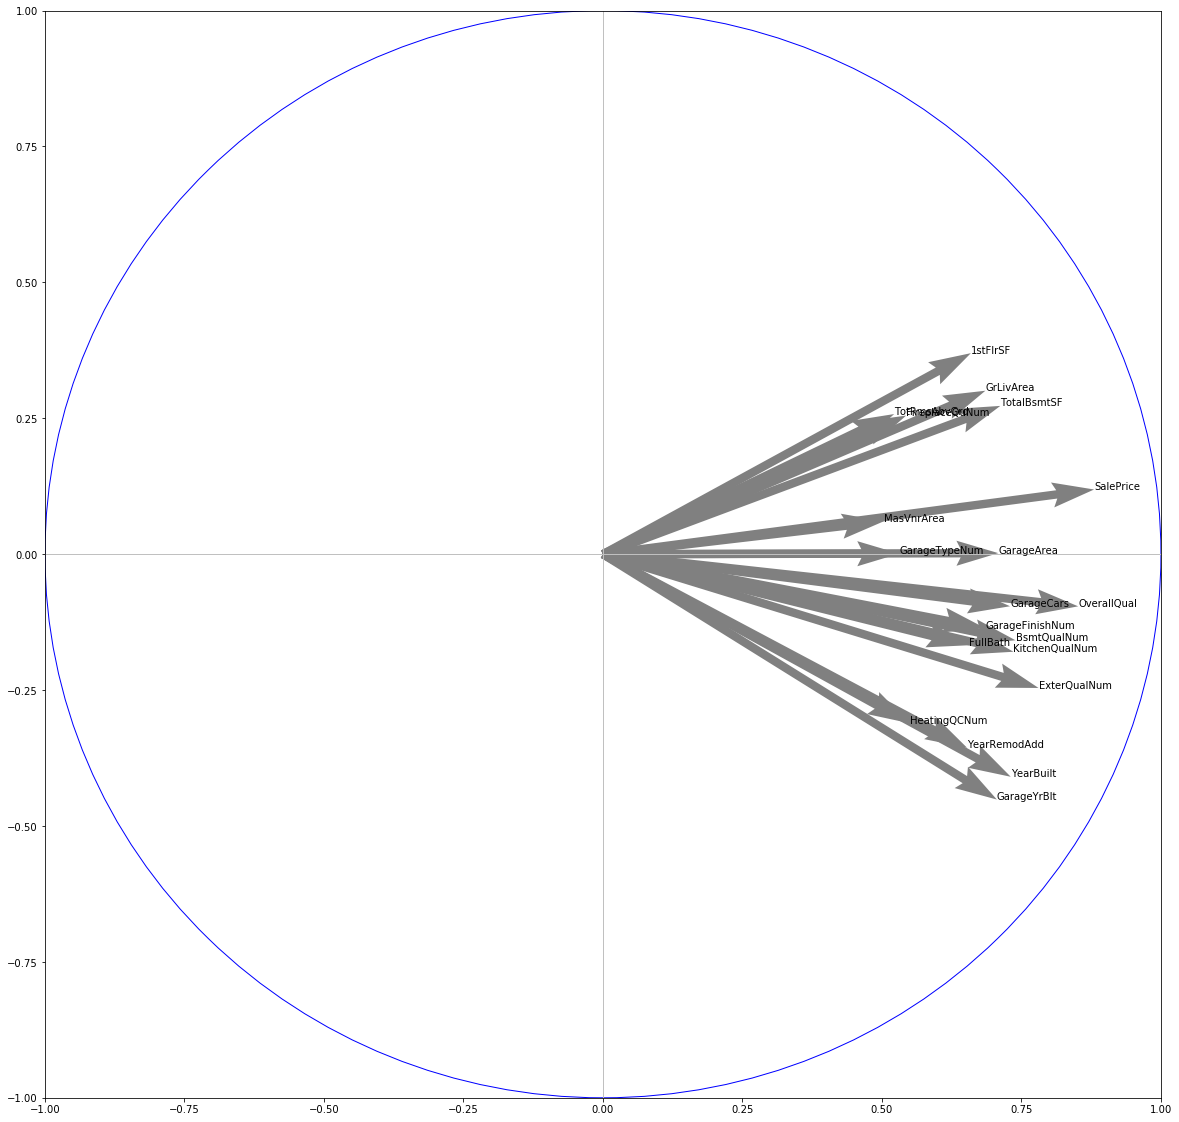

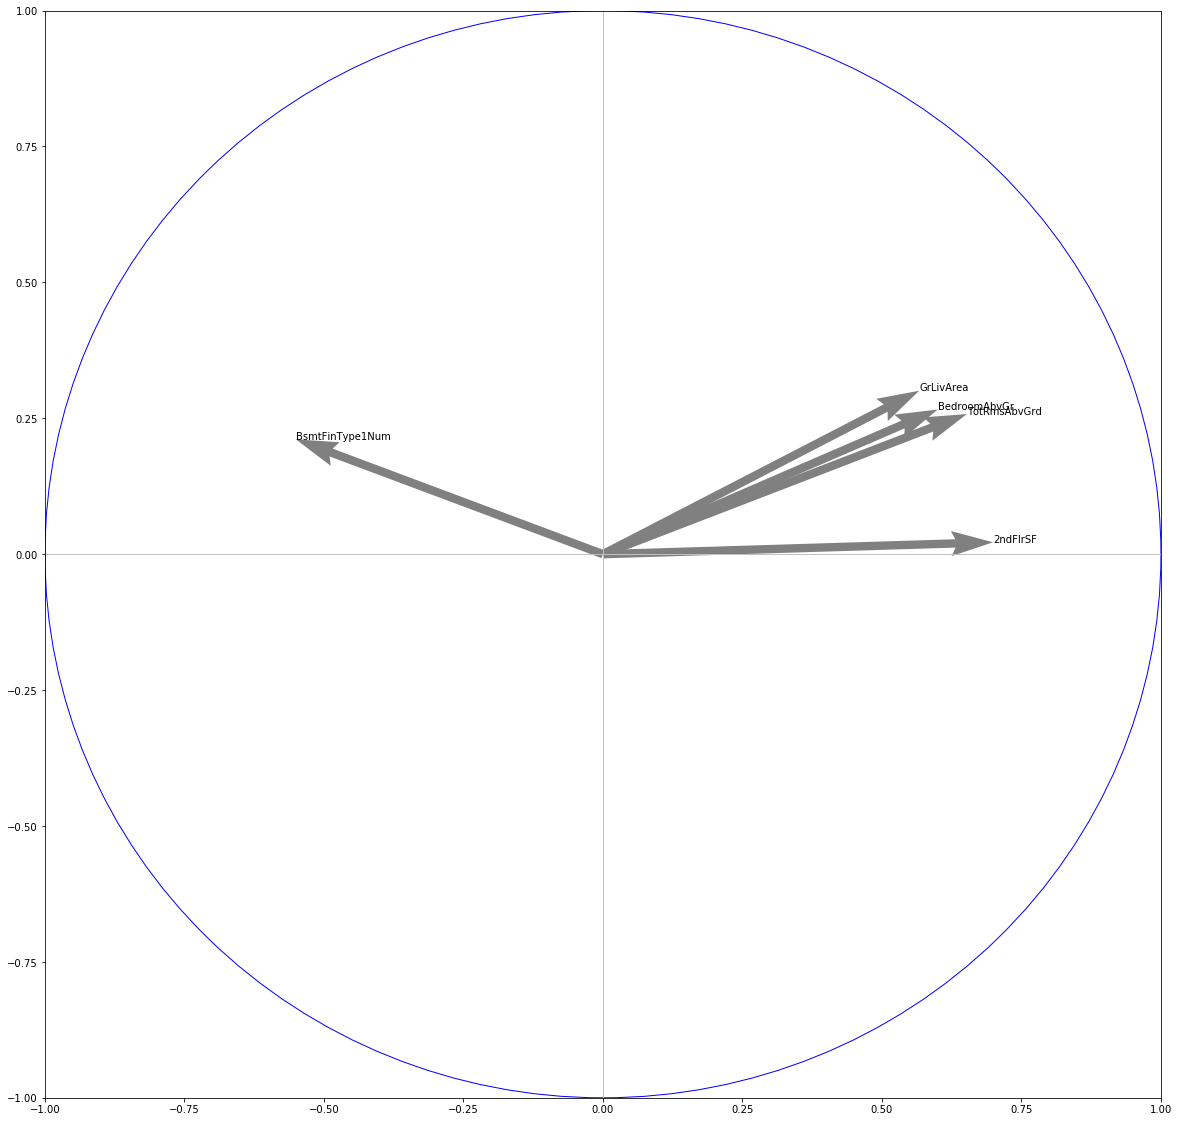

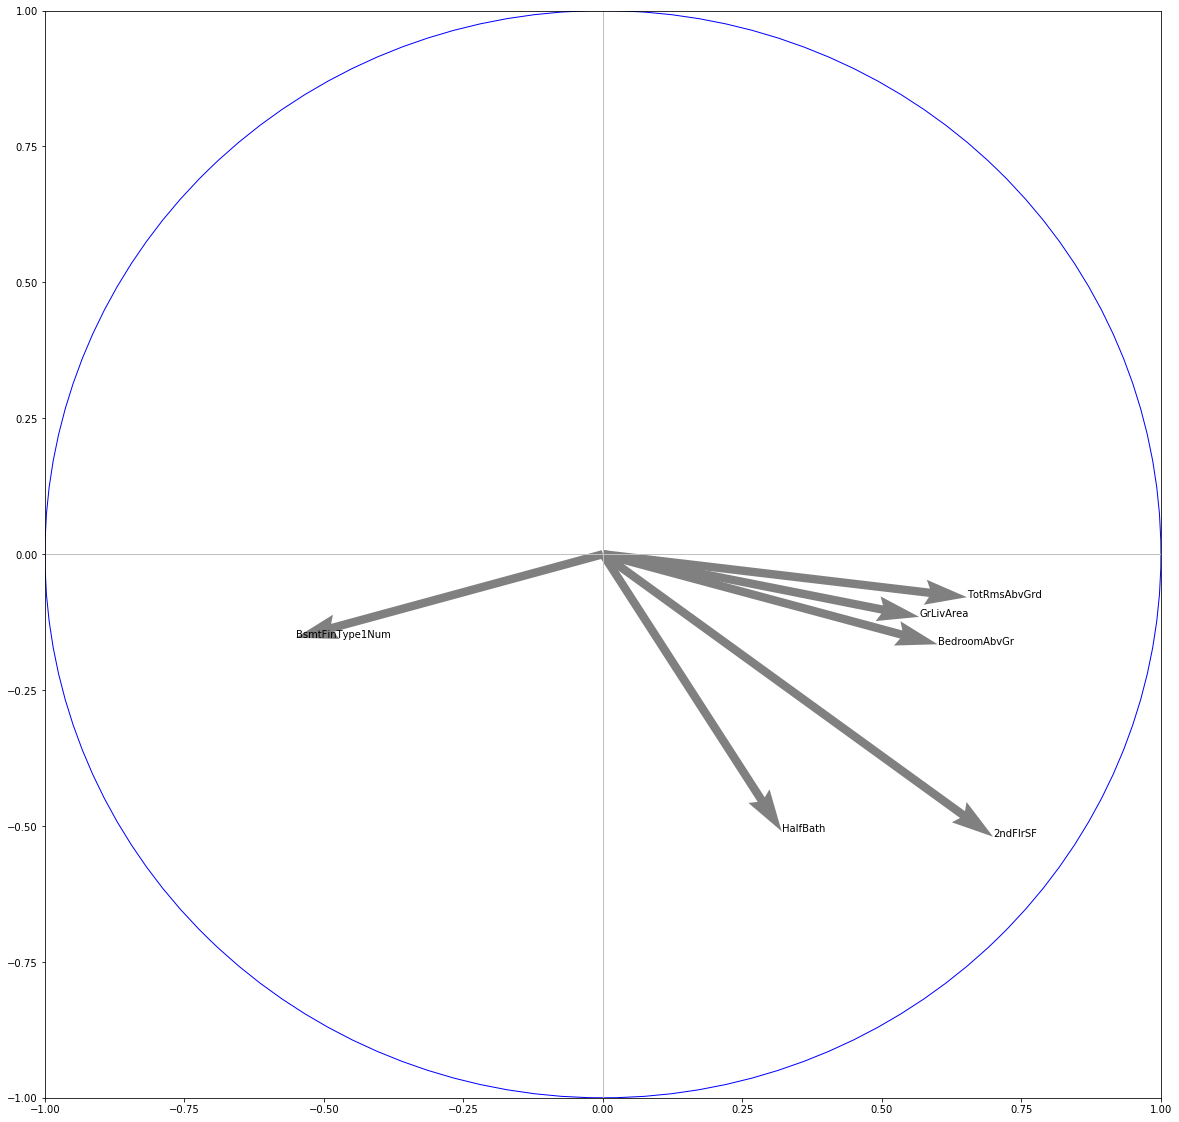

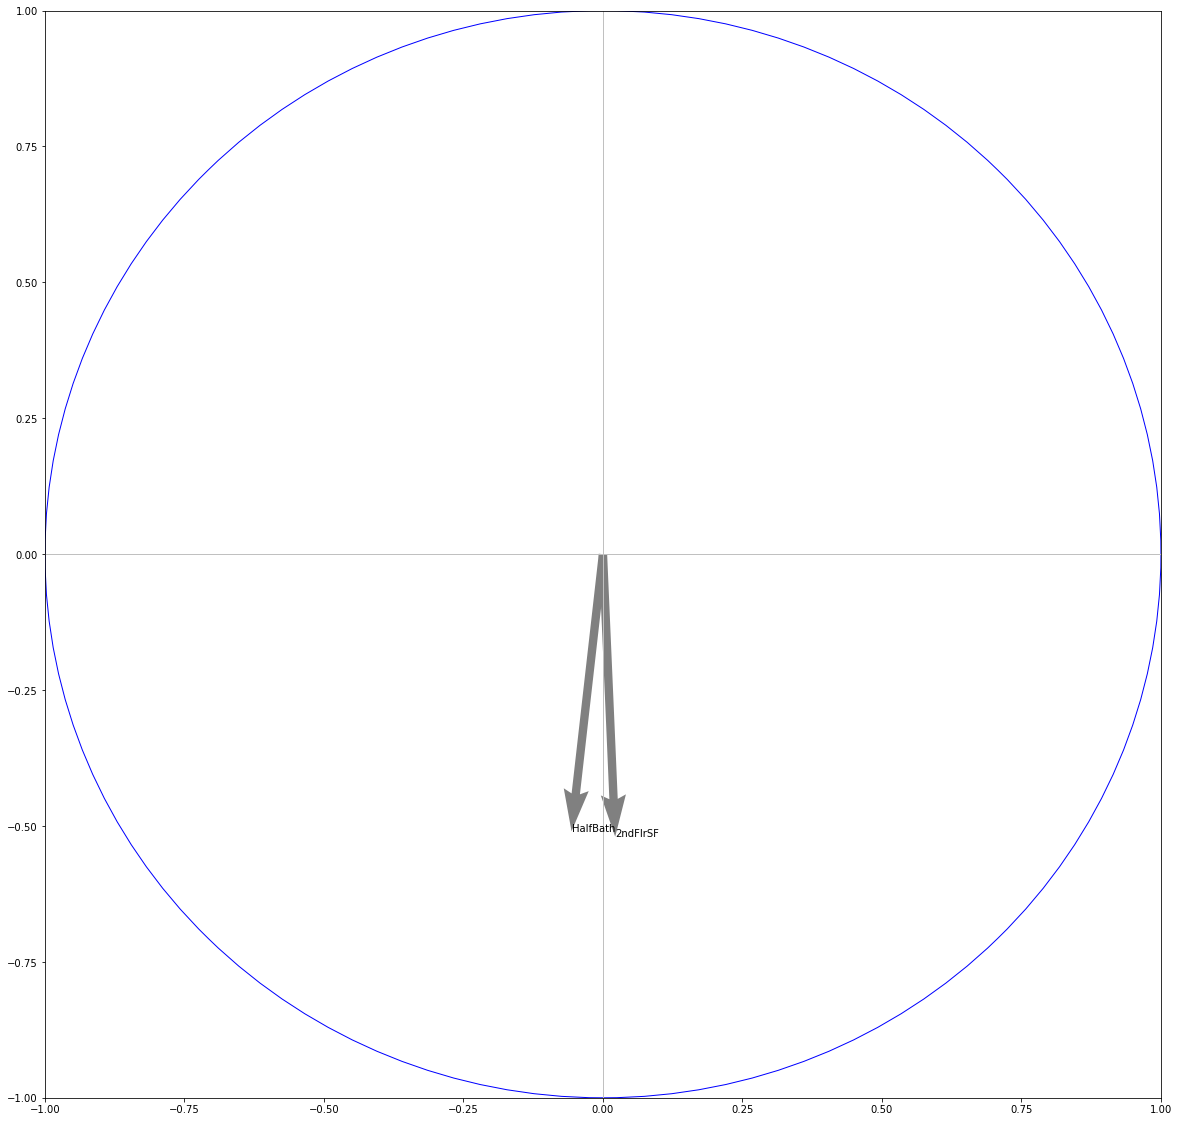

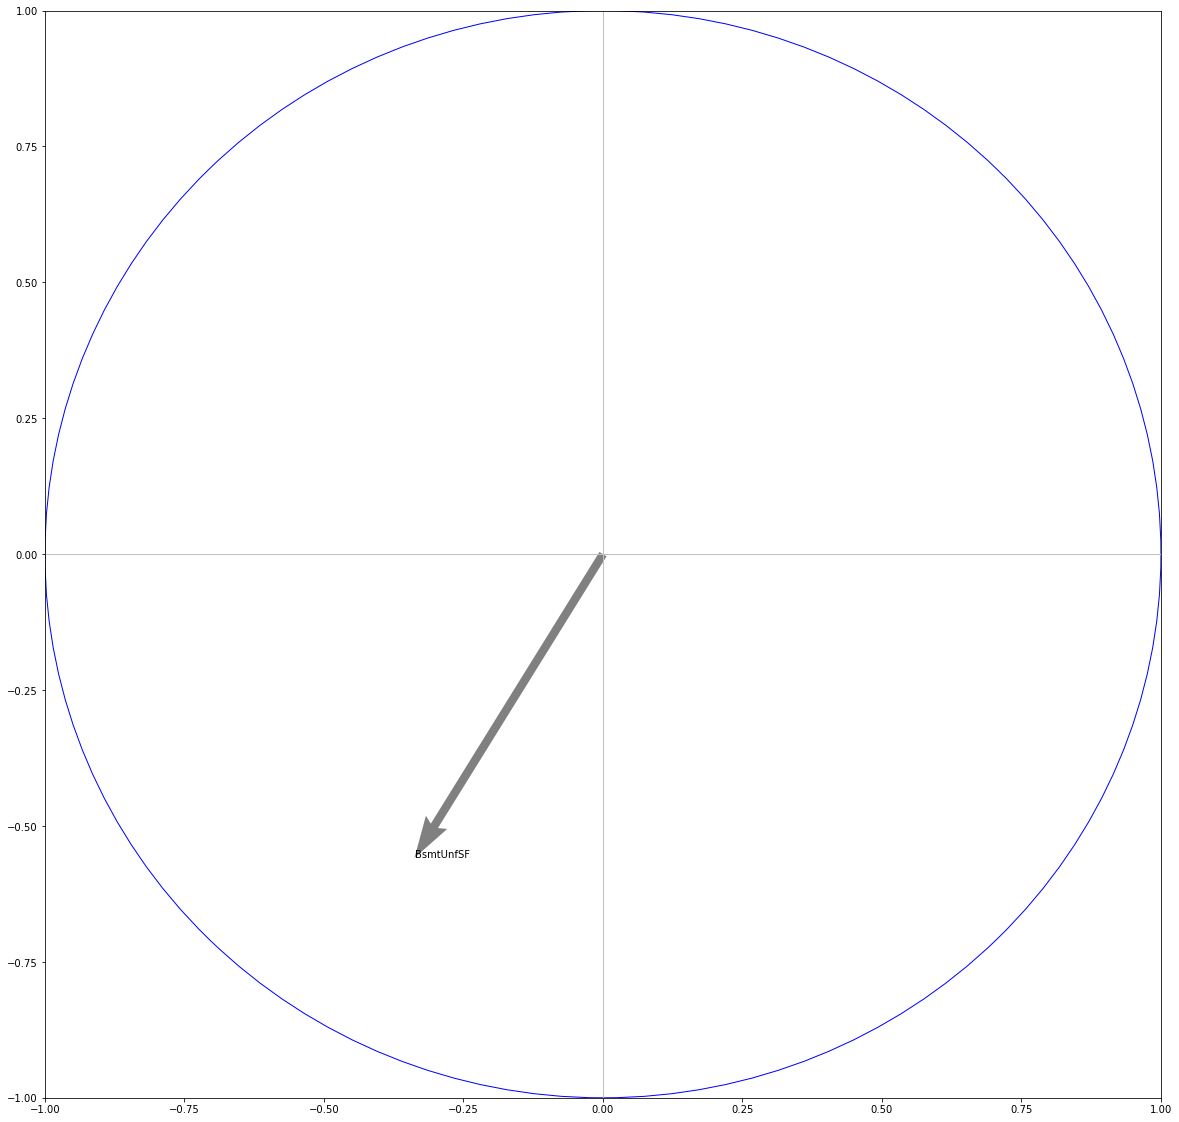

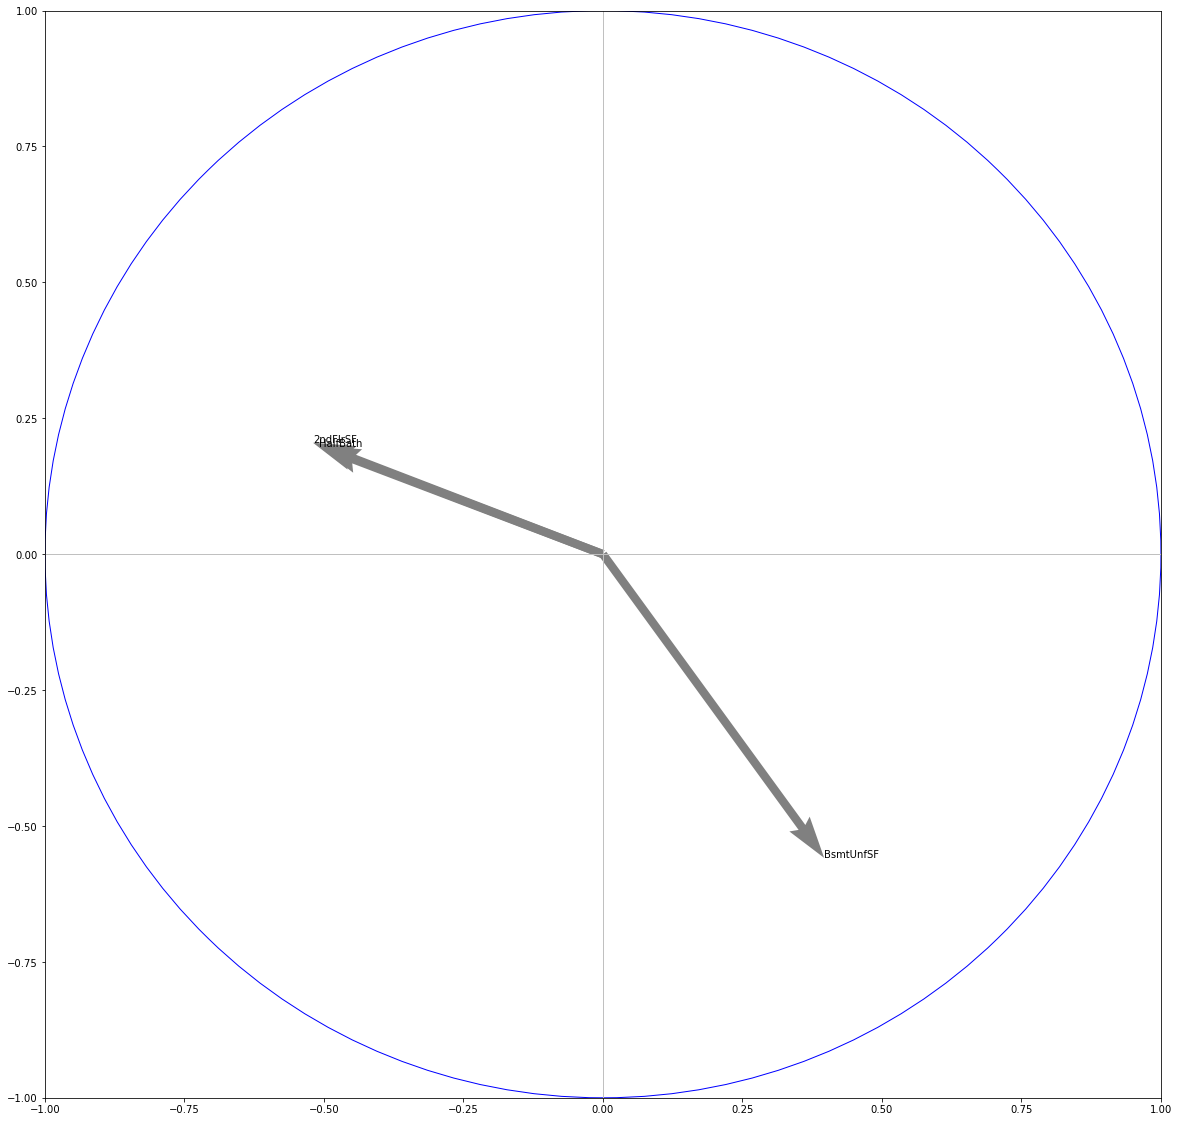

In [36]:
i = 0
for i in range(7):
    #cercle des corrélations
    fig, axes = plt.subplots(figsize=(20,20))
    axes.set_xlim(-1,1)
    axes.set_ylim(-1,1)
    #affichage des étiquettes (noms des variables)
    for j in range(nbr_values[i]):
        plt.annotate(labels[i][j],(my_axes[i][j][0],my_axes[i][j][1]))
        plt.quiver(my_axes[i][j][0],my_axes[i][j][1], 
                   angles='xy', scale_units='xy', scale=1, color="grey")

    #ajouter les axes
    plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
    plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

    #ajouter un cercle
    cercle = plt.Circle((0,0),1,color='blue',fill=False)
    axes.add_artist(cercle)
    #affichage
    plt.show()

In [37]:
list(labels[0])

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'ExterQualNum',
 'HeatingQCNum',
 'KitchenQualNum',
 'BsmtQualNum',
 'FireplaceQuNum',
 'BsmtFinType1Num',
 'GarageTypeNum',
 'GarageFinishNum']

## Cosinus square variables

In [38]:
cos2var = corvar**2
print(pd.DataFrame({'id':data_ok.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

                 id    COS2_1        COS2_2
0        MSSubClass  0.003149  3.887835e-02
1       LotFrontage  0.151780  1.002497e-02
2           LotArea  0.079129  2.542752e-03
3       OverallQual  0.725379  9.813319e-03
4       OverallCond  0.060650  3.719960e-03
5         YearBuilt  0.534107  7.097535e-02
6      YearRemodAdd  0.425668  1.396354e-02
7        MasVnrArea  0.253277  9.498918e-03
8        BsmtFinSF1  0.174591  1.962548e-01
9        BsmtFinSF2  0.001711  4.980907e-02
10        BsmtUnfSF  0.081026  1.283180e-01
11      TotalBsmtSF  0.507077  3.338795e-02
12         1stFlrSF  0.434744  1.632423e-03
13         2ndFlrSF  0.058208  4.887670e-01
14     LowQualFinSF  0.001266  1.946365e-02
15        GrLivArea  0.469754  3.211766e-01
16     BsmtFullBath  0.070431  2.387933e-01
17     BsmtHalfBath  0.002080  4.819084e-03
18         FullBath  0.430472  1.278502e-01
19         HalfBath  0.077948  1.025787e-01
20     BedroomAbvGr  0.023826  3.597455e-01
21     KitchenAbvGr  0.024580  1

## contributions
* We show for the first five axes

In [39]:
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]

print(pd.DataFrame({'id':data_ok.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2],'CTR_4':ctrvar[:,3],'CTR_5':ctrvar[:,4],'CTR_6':ctrvar[:,5]}))

                 id     CTR_1         CTR_2         CTR_3         CTR_4  \
0        MSSubClass  0.000266  9.827922e-03  1.925378e-02  4.542202e-02   
1       LotFrontage  0.012839  2.534178e-03  6.344584e-02  2.141104e-02   
2           LotArea  0.006694  6.427735e-04  7.392455e-02  8.900007e-03   
3       OverallQual  0.061362  2.480675e-03  2.755965e-03  6.021512e-04   
4       OverallCond  0.005131  9.403556e-04  1.178353e-02  6.665458e-02   
5         YearBuilt  0.045181  1.794161e-02  5.021968e-02  3.278745e-04   
6      YearRemodAdd  0.036008  3.529794e-03  3.795219e-02  6.326179e-03   
7        MasVnrArea  0.021425  2.401198e-03  1.096793e-03  7.766276e-04   
8        BsmtFinSF1  0.014769  4.961057e-02  6.368574e-02  4.182392e-05   
9        BsmtFinSF2  0.000145  1.259106e-02  4.000608e-02  7.836037e-03   
10        BsmtUnfSF  0.006854  3.243706e-02  3.416606e-02  6.318151e-02   
11      TotalBsmtSF  0.042895  8.440024e-03  2.229528e-02  5.262565e-02   
12         1stFlrSF  0.03